From : https://www.kaggle.com/yag320/list-of-fake-samples-and-public-private-lb-split

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm_notebook as tqdm
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


The statistics of training set and test set are very similar.

However, one thing that caught my eye was the fact that the distribution of the number of unique values (across features) is significantly different between training set and test set.

It seems that the test set consists of real samples as well as synthetic samples that were generated by sampling the real samples feature distributions (These are probably the "rows which are not included in scoring").

If this is correct, then finding out which sample is synthetic, and which is real should be relatively easy task:

Given a sample, we can go over its features and check if the feature value is unique.
If at least one of the sample's features is unique, then the sample must be a real sample.
It turns out that if a given sample has no unique values then it is a synthetic sample.
(It doesn't have to be like that, but in this dataset the probability is seemingly to low that this would not be the case).



In [2]:
test_path = '../input/test.csv'

df_test = pd.read_csv(test_path)
df_test.drop(['ID_code'], axis=1, inplace=True)
df_test = df_test.values

### Synetietic or not

In [3]:
unique_samples = []
unique_count = np.zeros_like(df_test) #create an array which shape is same as df_test
for feature in tqdm(range(df_test.shape[1])):
    _, index_, count_ = np.unique(df_test[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1 #1=unique feature / 0=synthetic

In [4]:
print('shape of df_test: '+ str(df_test.shape))
df_test[0:10,0:10]

shape of df_test: (200000, 200)


array([[ 11.0656,   7.7798,  12.9536,   9.4292,  11.4327,  -2.3805,
          5.8493,  18.2675,   2.1337,   8.81  ],
       [  8.5304,   1.2543,  11.3047,   5.1858,   9.1974,  -4.0117,
          6.0196,  18.6316,  -4.4131,   5.9739],
       [  5.4827, -10.3581,  10.1407,   7.0479,  10.2628,   9.8052,
          4.895 ,  20.2537,   1.5233,   8.3442],
       [  8.5374,  -1.3222,  12.022 ,   6.5749,   8.8458,   3.1744,
          4.9397,  20.566 ,   3.3755,   7.4578],
       [ 11.7058,  -0.1327,  14.1295,   7.7506,   9.1035,  -8.5848,
          6.8595,  10.6048,   2.989 ,   7.1437],
       [  5.9862,  -2.2913,   8.6058,   7.0685,  14.2465,  -8.6761,
          4.2467,  14.7632,   1.879 ,   7.2842],
       [  8.4624,  -6.1065,   7.3603,   8.2627,  12.0104,  -7.2073,
          4.167 ,  13.0809,  -4.3004,   6.3181],
       [ 17.3035,  -2.4212,  13.3989,   8.3998,  11.0777,   9.6449,
          5.9596,  17.8477,  -4.8068,   7.4643],
       [  6.9856,   0.8402,  13.7161,   4.7749,   8.6784, -13.76

In [5]:
print('shape of unique_count: '+ str(unique_count.shape))
unique_count[0:10,0:10] #1=unique feature / 0=synthetic

shape of unique_count: (200000, 200)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [6]:
print('shape of unique_count: '+ str(np.sum(unique_count, axis=1).shape))
print(np.sum(unique_count, axis=1)[0:10])

shape of unique_count: (200000,)
[ 0.  0.  0. 40.  0.  0.  0. 31.  0.  0.]


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


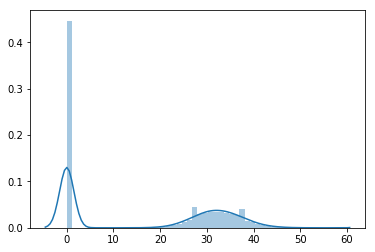

In [7]:
import seaborn as sns
sns.distplot(np.sum(unique_count, axis=1))

In [8]:
# Samples which have unique values are real the others are fake

#if feature's sum bigger than 0, that's a unique sample 
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0] 

#else 
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print(len(real_samples_indexes))
print(len(synthetic_samples_indexes))


100000
100000


In [9]:
np.argwhere(np.sum(unique_count, axis=1) > 0)[:,0]

array([     3,      7,     11, ..., 199995, 199996, 199999])

In [10]:
np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]


array([     0,      1,      2, ..., 199994, 199997, 199998])